### Stock_Market_Prediction 

In [258]:

# import pandas_datareader as pdr
# key=""

In [259]:
# df = pdr.get_data_tiingo('TSLA', api_key=key)

In [260]:
# df.to_csv('TSLA.csv')

In [261]:
import pandas as pd

In [262]:
df=pd.read_csv('TSLA.csv')

In [263]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,TSLA,2016-08-22 00:00:00+00:00,222.93,225.110,222.68,224.17,2065493,44.586,45.022,44.536,44.834,10327465,0.0,1.0
1,TSLA,2016-08-23 00:00:00+00:00,224.84,228.490,222.80,224.32,4784418,44.968,45.698,44.560,44.864,23922090,0.0,1.0
2,TSLA,2016-08-24 00:00:00+00:00,222.62,227.150,222.22,227.05,2570693,44.524,45.430,44.444,45.410,12853465,0.0,1.0
3,TSLA,2016-08-25 00:00:00+00:00,220.96,223.800,220.77,223.11,1762519,44.192,44.760,44.154,44.622,8812595,0.0,1.0
4,TSLA,2016-08-26 00:00:00+00:00,219.99,222.855,218.82,222.14,2238992,43.998,44.571,43.764,44.428,11194960,0.0,1.0


In [264]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,TSLA,2021-08-13 00:00:00+00:00,717.17,729.90,714.34,723.7100,16671844,717.17,729.90,714.34,723.7100,16671844,0.0,1.0
1254,TSLA,2021-08-16 00:00:00+00:00,686.17,709.50,676.40,705.0700,23103303,686.17,709.50,676.40,705.0700,23103303,0.0,1.0
1255,TSLA,2021-08-17 00:00:00+00:00,665.71,674.58,648.84,672.6600,23721279,665.71,674.58,648.84,672.6600,23721279,0.0,1.0
1256,TSLA,2021-08-18 00:00:00+00:00,688.99,695.77,669.35,669.7479,20349375,688.99,695.77,669.35,669.7479,20349375,0.0,1.0
1257,TSLA,2021-08-19 00:00:00+00:00,673.47,686.55,667.59,678.2100,14313486,673.47,686.55,667.59,678.2100,14313486,0.0,1.0


In [265]:
df1=df.reset_index()['close']

In [266]:
df1

0       222.93
1       224.84
2       222.62
3       220.96
4       219.99
         ...  
1253    717.17
1254    686.17
1255    665.71
1256    688.99
1257    673.47
Name: close, Length: 1258, dtype: float64

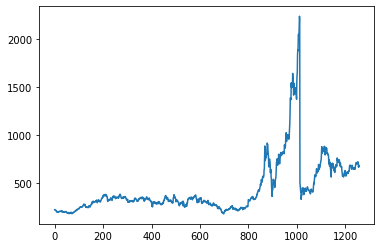

In [268]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [270]:
import numpy as np

In [271]:
df1

0       222.93
1       224.84
2       222.62
3       220.96
4       219.99
         ...  
1253    717.17
1254    686.17
1255    665.71
1256    688.99
1257    673.47
Name: close, Length: 1258, dtype: float64

In [272]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [273]:
print(df1)

[[0.02134209]
 [0.02226937]
 [0.02119158]
 ...
 [0.23630679]
 [0.24760897]
 [0.24007418]]


In [274]:

training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [275]:
training_size,test_size

(817, 441)

In [276]:
train_data

array([[0.02134209],
       [0.02226937],
       [0.02119158],
       [0.02038567],
       [0.01991475],
       [0.01758926],
       [0.01571527],
       [0.01604055],
       [0.01058365],
       [0.00913204],
       [0.01158376],
       [0.01104001],
       [0.00892814],
       [0.00752508],
       [0.0093845 ],
       [0.00829215],
       [0.00846692],
       [0.01041373],
       [0.01283147],
       [0.01328783],
       [0.0124625 ],
       [0.01274408],
       [0.01333152],
       [0.01382672],
       [0.01457437],
       [0.01303052],
       [0.01325384],
       [0.01054967],
       [0.01216635],
       [0.01686102],
       [0.01574925],
       [0.01431706],
       [0.01069532],
       [0.00856402],
       [0.01067104],
       [0.01025838],
       [0.01094292],
       [0.01032635],
       [0.00851547],
       [0.00727748],
       [0.00977289],
       [0.01193817],
       [0.00977289],
       [0.01025352],
       [0.01154978],
       [0.01134587],
       [0.01129732],
       [0.012

In [277]:
import numpy

def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [278]:

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [279]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [280]:
print(X_test.shape), print(ytest.shape)

(340, 100)
(340,)


(None, None)

In [281]:

X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [282]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [283]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [284]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_15 (LSTM)               (None, 100, 50)           10400     
_________________________________________________________________
lstm_16 (LSTM)               (None, 100, 50)           20200     
_________________________________________________________________
lstm_17 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [285]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_15 (LSTM)               (None, 100, 50)           10400     
_________________________________________________________________
lstm_16 (LSTM)               (None, 100, 50)           20200     
_________________________________________________________________
lstm_17 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [286]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 6s 241ms/step - loss: 9.4001e-04 - val_loss: 0.0597
Epoch 2/100
12/12 [==============================] - 2s 172ms/step - loss: 3.7462e-04 - val_loss: 0.0491
Epoch 3/100
12/12 [==============================] - 2s 167ms/step - loss: 2.7300e-04 - val_loss: 0.0324
Epoch 4/100
12/12 [==============================] - 2s 164ms/step - loss: 2.0649e-04 - val_loss: 0.0205
Epoch 5/100
12/12 [==============================] - 2s 175ms/step - loss: 1.4420e-04 - val_loss: 0.0158
Epoch 6/100
12/12 [==============================] - 2s 163ms/step - loss: 1.3525e-04 - val_loss: 0.0174
Epoch 7/100
12/12 [==============================] - 2s 164ms/step - loss: 1.3619e-04 - val_loss: 0.0175
Epoch 8/100
12/12 [==============================] - 2s 167ms/step - loss: 1.2493e-04 - val_loss: 0.0153
Epoch 9/100
12/12 [==============================] - 2s 166ms/step - loss: 1.1747e-04 - val_loss: 0.0145
Epoch 10/100
12/12 [==============================] - 2

In [287]:
import tensorflow as tf

In [288]:
tf.__version__

'2.6.0'

In [289]:

train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [290]:

train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [291]:

import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

301.2810828206692

In [292]:

math.sqrt(mean_squared_error(ytest,test_predict))

744.7729221824985

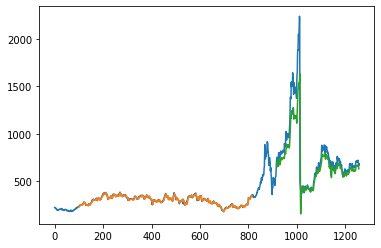

In [293]:

look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict

plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [294]:
len(test_data)

441

In [295]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape


(1, 100)

In [296]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [297]:
temp_input

[0.22169843381331983,
 0.23738457505170446,
 0.2343842546291351,
 0.24860907475555633,
 0.24888580333822052,
 0.2388604608259134,
 0.24508928137956476,
 0.24179766771208572,
 0.25391546670032716,
 0.2832098573634077,
 0.26860150113118875,
 0.2718154366000252,
 0.2722669411296351,
 0.2600568992805056,
 0.26217363019351575,
 0.27437396226781496,
 0.26251347231257705,
 0.2672275679926982,
 0.27149986891803973,
 0.25525541562691156,
 0.25023546203963526,
 0.24178795793725538,
 0.25753721271203717,
 0.24562331899523243,
 0.2401372962161007,
 0.23884589616366797,
 0.23525327947644886,
 0.23954014506403593,
 0.21850391789414397,
 0.21275573119459357,
 0.1994970336637893,
 0.1906611385681966,
 0.19942421035256191,
 0.19315655069958926,
 0.19366145899076598,
 0.18666556622551922,
 0.19798716367767427,
 0.19512278010272938,
 0.2075318723358805,
 0.20668226703822734,
 0.21369272446571957,
 0.21938265251628813,
 0.21664935090155257,
 0.21600850576275132,
 0.20689102719707925,
 0.1912194506209401,


In [298]:

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
       
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
     
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.21927884]
101
1 day input [0.23738458 0.23438425 0.24860907 0.2488858  0.23886046 0.24508928
 0.24179767 0.25391547 0.28320986 0.2686015  0.27181544 0.27226694
 0.2600569  0.26217363 0.27437396 0.26251347 0.26722757 0.27149987
 0.25525542 0.25023546 0.24178796 0.25753721 0.24562332 0.2401373
 0.2388459  0.23525328 0.23954015 0.21850392 0.21275573 0.19949703
 0.19066114 0.19942421 0.19315655 0.19366146 0.18666557 0.19798716
 0.19512278 0.20753187 0.20668227 0.21369272 0.21938265 0.21664935
 0.21600851 0.20689103 0.19121945 0.20394411 0.20689588 0.20614823
 0.20381303 0.20931847 0.20920681 0.21299362 0.20409461 0.20676966
 0.21246444 0.21572207 0.21451806 0.21591626 0.23186942 0.24315704
 0.2392974  0.24747789 0.2436134  0.24309878 0.24223461 0.24271039
 0.23333074 0.2260824  0.23004399 0.23205391 0.24601171 0.23768072
 0.23032071 0.22897106 0.22587364 0.22684461 0.23377739 0.231248
 0.2283205  0.22546583 0.23237919 0.22614551 0.22721359 0.24195788
 0.24673994 0.25764888 0.25768286 0.

10 day output [[0.13379535]]
11 day input [0.27181544 0.27226694 0.2600569  0.26217363 0.27437396 0.26251347
 0.26722757 0.27149987 0.25525542 0.25023546 0.24178796 0.25753721
 0.24562332 0.2401373  0.2388459  0.23525328 0.23954015 0.21850392
 0.21275573 0.19949703 0.19066114 0.19942421 0.19315655 0.19366146
 0.18666557 0.19798716 0.19512278 0.20753187 0.20668227 0.21369272
 0.21938265 0.21664935 0.21600851 0.20689103 0.19121945 0.20394411
 0.20689588 0.20614823 0.20381303 0.20931847 0.20920681 0.21299362
 0.20409461 0.20676966 0.21246444 0.21572207 0.21451806 0.21591626
 0.23186942 0.24315704 0.2392974  0.24747789 0.2436134  0.24309878
 0.24223461 0.24271039 0.23333074 0.2260824  0.23004399 0.23205391
 0.24601171 0.23768072 0.23032071 0.22897106 0.22587364 0.22684461
 0.23377739 0.231248   0.2283205  0.22546583 0.23237919 0.22614551
 0.22721359 0.24195788 0.24673994 0.25764888 0.25768286 0.25825574
 0.2600569  0.25251726 0.25963452 0.25780423 0.25675072 0.26375632
 0.26129004 0.246239

20 day output [[0.10561923]]
21 day input [0.24178796 0.25753721 0.24562332 0.2401373  0.2388459  0.23525328
 0.23954015 0.21850392 0.21275573 0.19949703 0.19066114 0.19942421
 0.19315655 0.19366146 0.18666557 0.19798716 0.19512278 0.20753187
 0.20668227 0.21369272 0.21938265 0.21664935 0.21600851 0.20689103
 0.19121945 0.20394411 0.20689588 0.20614823 0.20381303 0.20931847
 0.20920681 0.21299362 0.20409461 0.20676966 0.21246444 0.21572207
 0.21451806 0.21591626 0.23186942 0.24315704 0.2392974  0.24747789
 0.2436134  0.24309878 0.24223461 0.24271039 0.23333074 0.2260824
 0.23004399 0.23205391 0.24601171 0.23768072 0.23032071 0.22897106
 0.22587364 0.22684461 0.23377739 0.231248   0.2283205  0.22546583
 0.23237919 0.22614551 0.22721359 0.24195788 0.24673994 0.25764888
 0.25768286 0.25825574 0.2600569  0.25251726 0.25963452 0.25780423
 0.25675072 0.26375632 0.26129004 0.24623989 0.23630679 0.24760897
 0.24007418 0.21927884 0.20938301 0.19653399 0.18410338 0.173012
 0.16345367 0.15538284 

In [299]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [300]:
import matplotlib.pyplot as plt

In [301]:
len(df1)

1258

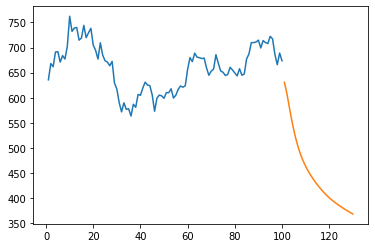

In [302]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

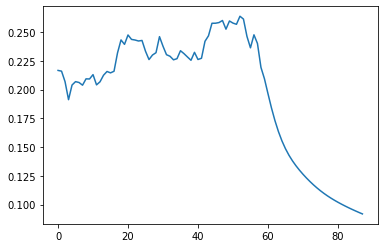

In [303]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [304]:
df3=scaler.inverse_transform(df3).tolist()

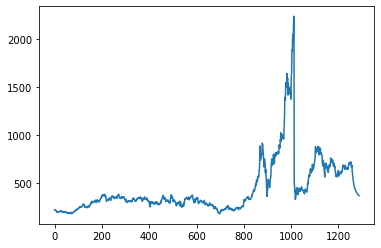

In [305]:
plt.plot(df3)